# <center>PREVISÃO DE TRANSPORTADOS - COMPETIÇÃO KAGGLE</center>


As competições kaggle são muito úteis para o desenvolvimento de habilidades e treinamento de profissionais na área de dados. Diante de tudo isso, iremos utilizar um conjunto de dados intitulado "Spaceship-Titanic".<br>
Segundo as informações do conjunto de dados, era uma nave que transportava passageiros, mas de alguma forma a nave colidiu com algum objeto estranho. Porém alguns dados do sistema computacional foram restaurados.<br>
Baseado nisto, nossa missão será de fazer a previsão dos passageiros transportados para outra dimensão sobrevivendo a colisão.<br>




Para darmos ínicio ao projeto, você precisará criar uma conta no kaggle e baixar sua API que fora ensinado no nosso tutorial no MEDIUM. Feito o download você pode anexar em arquivos ao lado ou utilizar diretamente do seu drive.<br>
Ao anexar a sua chave do kaggle, você precisará ter a biblioteca do kaggle instalada no seu colab, mas já deixei tudo pronto logo abaixo. Inclusive a permissão de uso da chave kaggle com chmod e também o código de donwload do conjunto de dados do Spaceship-Titanic. Assim, daremos ínicio ao nosso projeto.<br>


## PREPARAÇÃO AMBIENTE

In [1]:
 #instalando a biblioteca do kaggle mais recente no seu colab, retirar o # antes do !pip
 #!pip install kaggle --upgrade

In [2]:
 #criando um diretório para sua chave kaggle e vendo se deu certo com o comando ls
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/
 !ls ~/.kaggle

kaggle.json


In [36]:
#autorizando o uso da chave kaggle
#!chmod 600 ~/.kaggle.json

In [4]:
 #Download do conjunto de dados do Spaceship-Titanic
 !kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 54.7MB/s]


<strong>Alerta:</strong> Se der "401 - Unauthorized" você precisará baixar uma chave kaggle.json mais recente.

In [5]:
# a base de dados vem em formato zip, basta apenas rodar o comando unzip
! unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               



# 1 - COMPETIÇÃO KAGGLE

Os dados estão dividos em três arquivos: 
- sample_submission.csv
- train.csv
- test.csv


O que são?
_____
- train.csv: Registros pessoais de cerca de dois terços (8700) dos passageiros, para serem usados ​​como dados de treinamento.<br>
- test.csv: Registros pessoais para o terço restante (~4300) dos passageiros, para serem usados ​​como dados de teste. Sua tarefa é prever o valor de Transportado para os passageiros neste conjunto.
- sample_submission.csv - Um arquivo exemplo de envio no formato correto.


### 1.1 Dados das colunsa no conjunto de Train e Test


- PassengerId - Um ID exclusivo para cada passageiro. Cada Id assume o formato gggg_pp, onde gggg indica um grupo com o qual o passageiro está viajando e pp é seu número dentro do grupo. As pessoas em um grupo geralmente são membros da família, mas nem sempre.
- HomePlanet - O planeta de onde o passageiro partiu, normalmente seu planeta de residência permanente.
- CryoSleep - Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. Os passageiros em sono criogênico estão confinados em suas cabines.
- Cabin - O número da cabine onde o passageiro está hospedado. Assume o formato deck/num/side, onde o lado pode ser P para bombordo ou S para estibordo.
- Destino - O planeta para o qual o passageiro irá desembarcar.
- Age - A idade do passageiro.
- VIP - Se o passageiro pagou pelo serviço VIP especial durante a viagem.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Valor que o passageiro cobrou em cada uma das muitas comodidades de luxo da Spaceship Titanic.
- Name - O nome e sobrenome do passageiro.
- Transportaded - Se o passageiro foi transportado para outra dimensão. Este é o alvo, a coluna que você está tentando prever. (Este valor só tem no conjunto de dados treinamento)


### CARREGANDO BIBLITOECAS NECESSÁRIAS

In [6]:
import pandas as pd #biblioteca para manipulação dos dados
import numpy as np #biblioteca que nos permitirá fazer cálculos estatísticos
import matplotlib.pyplot as plt #biblioteca de geração de gráficos

#bibliotecas para encodar os dados(dummy)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
#nosso modelo classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB
#separação entre teste e treino
from sklearn.model_selection import train_test_split

#biblioteca de métricas
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#geração de validação cruzada e avaliador
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [7]:
#base de treino do nosso conjunto de dados
base_treino = pd.read_csv("train.csv")
base_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
#cabeçalho contendo as 5 primeiras linhas do conjunto de dados
base_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
#chamando nossa base de teste e verificado as informações do conjunto de dados
base_teste = pd.read_csv("test.csv")
base_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [10]:
base_treino.shape, base_teste.shape

((8693, 14), (4277, 13))

### 2 - ANÁLISE EXPLORATÓRIA


In [11]:
#Nulos na base de treino
base_treino.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
#Nulos na base de teste
base_teste.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Avalição de info: Tirando a coluna do passageiro e a coluna alvo, vemos que a maioria dos dados contém dados nulos.

In [13]:
#pedimos a descrição em treino para verificarmos se apresenta dado Nulo
base_treino.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


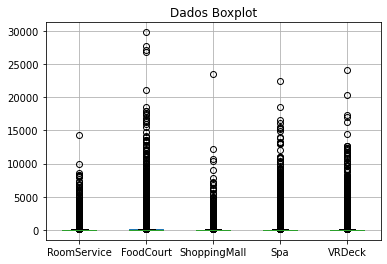

In [14]:
#criamos uma base amostral apenas para visualizarmos o boxplot das colunas númericas
datanum = pd.DataFrame(base_treino.iloc[:,7:12])
#atribuindo titulo e vendo o boxplot que nos mostra os quartis, isso representa a concentração dos dados
plt.title("Dados Boxplot")
datanum.boxplot()
plt.show()

<strong>Avaliação Describe:</strong> Estes dados correspondem aos valores dos serviços usufruidos pelos usuários da espaçonave, em muitos dos casos há uma discrepância gigantesca de valores pagos.

### 3 PRE-PROCESSAMENTO DE DADOS

Um dado muito importante e que precisamos transformar em númerico é o a idade (Age) assim podemos usar o .astype('int32') ou o pd.to_numeric:

In [15]:
#Tranformando a coluna Age em inteiro
base_treino["Age"] = pd.to_numeric(base_treino["Age"], errors='coerce')

#precisamos transformar no conjunto de teste também
base_teste["Age"] = pd.to_numeric(base_teste["Age"], errors='coerce')
base_teste.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


Descobrindo e sustituindo dados Dados Nulos, também removerei Outliers em RoomService

In [16]:
#Criando um laço que no intervalo de 7 a 12 subtituirá os Nulos pela média
for item in range(7,12):
  nome_col = base_treino.columns[item] #nome das colunas definidas pelo range(7 a 12)
  media_treino = np.nanmean(base_treino.iloc[:, item]) #média da coluna pela iteração
  base_treino[nome_col] = base_treino[nome_col].fillna(media_treino) #preenchendo os valores pela média

  #mesmo procedimento será feito nas colunas na base de teste
  nome_col = base_teste.columns[item]
  media_teste = np.nanmean(base_teste.iloc[:, item])
  base_teste[nome_col] = base_teste[nome_col].fillna(media_teste)

#A coluna de Age ficou de fora por estar separada dos valores 7 a 12 porém passamos individualmente:
base_treino["Age"] = base_treino["Age"].fillna(media_treino)
base_teste["Age"] = base_teste["Age"].fillna(media_teste)

Porque usar média e não a mediana? Se você analisar pelo describe, todos os valores nos atributos de dados são compostos de gastos 0 em serviços usufruidos ou paradoxalmente um gasto elevado (75% de quartil) não tendo um valor mediano entre 0 e um número elevado. Então optei por usar a média em valores Nan.

Agora vamos encontrar a moda para subtituir nas colunas categóricas os valores NaN

In [17]:
#encontrando a mediana e subtituindo colunas com moda usando um laço
for item in range(1,5):

  nome_col = base_treino.columns[item] #nome das colunas definidas pelo range(1 a 5)
  moda_treino = str(base_treino[nome_col].mode(dropna=True)) #procurando a moda
  base_treino[nome_col] = base_treino[nome_col].fillna(moda_treino) #substituindo os valores NA pela moda

  #aplicando o mesmo procedimento em teste
  nome_col = base_teste.columns[item]
  moda_teste = str(base_teste[nome_col].mode(dropna=True))
  base_teste[nome_col] = base_teste[nome_col].fillna(moda_teste)

# A coluna VIP apresenta problema por estar deslocada das demais então passaremos o valor manualmente
base_treino["VIP"] = base_treino["VIP"].fillna(moda_treino)
base_teste["VIP"] = base_teste["VIP"].fillna(moda_teste)

# verificando se deu certo
base_teste.isnull().sum()



PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

Utilizaremos posteriormente o classificador naive bayes, para isso precisaremos que as features estejam em um mesmo tipo de variável númerico. <br>
Com isso,  dentre as opções usarei o labelencoder, pois temos muitos atributos para utilizar ficando inviável com o OneHotEncoding. Todavia, duas colunas apresentam valores booleanos que nos permite realizar o preprocessamento com LabelBinarizer que gera valores 0 ou 1.



In [18]:
#encodador das colunas LabelEncoder: Gera números de 0 a n
labele = LabelEncoder()
#Colunas que não devem receber labelencoder pois já são númericas
listanao = ["Age", "Name", "PassengerId", "VIP","CryoSleep"]

#se for objeto procura e usa o label
lista_base = [base_treino, base_teste] #adicionamos as listas a outra lista para iterar sobre ela


def encodador_label():
#criando função que tem um laço que percorrer as listas dentro da lista e trasforma os valores que não são object  
  for valor in lista_base:
    for item in valor.select_dtypes(include="object"): #valores que não são do tipo object
        if item not in listanao:
          valor[item] = labele.fit_transform(valor[item]) #substitua os valores
          
#padronizador que gera valores binários entre 0 e 1      
binarizer = LabelBinarizer()  


def encodador_binarizer():
#Aqui criamos a binarização, mas precisamos de fato tornar os registros "False" e "True" em um valor booleano

  base_treino["CryoSleep"]= base_treino["CryoSleep"].astype("bool") #transforma os valores da coluna em booleano
  base_treino["CryoSleep"] = binarizer.fit_transform(base_treino["CryoSleep"]) #faz a transformação em binário

  #mesmos procedimentos executados nas duas linhas acima
  base_treino["VIP"]= base_treino["VIP"].astype("bool")
  base_treino["VIP"] = binarizer.fit_transform(base_treino["VIP"])

  base_teste["CryoSleep"]= base_teste["CryoSleep"].astype("bool")
  base_teste["CryoSleep"] = binarizer.fit_transform(base_teste["CryoSleep"])

  base_teste["VIP"]= base_teste["VIP"].astype("bool")
  base_teste["VIP"] = binarizer.fit_transform(base_teste["VIP"])

#chamando as funções
encodador_label()
encodador_binarizer()

In [19]:
#verificando o resultado
base_treino.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,2,0,150,3,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,0,2185,3,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,2,0,2,3,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,2,0,2,3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,0,2187,3,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


ESCALAS DIFERENTE O QUE FAZER? 
O dataset apresenta um conjunto de valores bem discrepantes em termos de números decimais a valores gigantescos em inteiros. Assim, precisarei aplicar um técnica de padronização, nesse caso o Standarscaler(Padronização) que aproxima os dados de média a 0 e desvio padrão igual a 1.

In [20]:
#Assim utilizo aqui o StandardScaler nas colunas desejadas
padrao = StandardScaler() #chamando o standard
base_treino.iloc[:, 1:12]= padrao.fit_transform(base_treino.iloc[:, 1:12]) #aplicando nas colunas desejadas em treino
base_treino.head()# verificando se o resultado gerado deu certo

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0.451063,-0.77348,-1.457967,0.641629,0.107533,-0.220196,-0.340590,-0.287314,-0.290817,-0.276663,-0.269023,Maham Ofracculy,False
1,0002_01,-0.757285,-0.77348,-0.444889,0.641629,-0.251843,-0.220196,-0.175364,-0.281669,-0.248968,0.211505,-0.230194,Juanna Vines,True
2,0003_01,0.451063,-0.77348,-1.531645,0.641629,0.562742,4.541407,-0.275409,1.955616,-0.290817,5.694289,-0.225782,Altark Susent,False
3,0003_02,0.451063,-0.77348,-1.531645,0.641629,-0.036217,-0.220196,-0.340590,0.517406,0.330225,2.683471,-0.098708,Solam Susent,False
4,0004_01,-0.757285,-0.77348,-0.443894,0.641629,-0.443510,-0.220196,0.118709,-0.243409,-0.038048,0.225732,-0.267258,Willy Santantines,True




```
# Isto está formatado como código
```

AVALIAÇÃO PRÉ-PROCESSAMENTO: Fiz todo o procedimento básico 
1º - Removemos os valores nulos das colunas substituindo pela média nos númericos e pela moda nos categóricos. A média foi utilizada ao invés da mediana devido os valores estarem bem mais concentrados próximo a zero, tornando a mediana praticamente 0.

2º - Utilizei LabelEncoder e BinarizeEncoder para transformar os dados em númericos;

3º - Utilizei a padronização para tornar possível a criação do modelo de NaiveBayes.

### 4 - SEPARANDO OS DADOS DE TESTE E TREINO

Para executarmos nosso modelo, precisamos ter uma coluna alvo e as colunas que permitem a previsão da coluna alvo, então criaremos os valores com as colunas previsores e a coluna alvo com a coluna classe

In [21]:
previsores = base_treino.iloc[:, 1:12].values #nossos atributos que treinam para prever
classe = base_treino.iloc[:, 13].values #alvo a ser atingido

Para tornarmos modelo possível e generalizado, isso é gerar um modelo que possa ser utilizado no mundo real sem causar super ajustes ou ajustes insuficientes na previsão, utilizareos o train_test_split que separa os dados.
Mas porque generalizar? Porque dados ajustados se saem bem no treino, mas se diante de usa base de dados que nunca viu os dados não conseguem prever por terem sido adaptados demais ao seu conjunto de treino. Caso o modelo seja insuficiente ele nem consegue performar bem nem no treino nem no teste.

In [22]:
#aqui separamos os dados em treino e teste com aleatoriedade nula e um tamanho  70% para treino e 30% de teste
X_train,X_test,y_train,y_test = train_test_split(previsores, 
                                                 classe,
                                                 random_state=0, test_size=0.3)

### 5 - MONTANDO A PREVISÃO DO MODELO EM X_TEST

O modelo que usaremos é o modelo de naive bayes que realiza uma aprendizagem de máquina supondo que os atributos são independentes. Assim, atráves de modelos probabilísticos ele classifica os atributos e seus valores númericos gerando uma previsão, sua base central está no Teorema de Bayes. Para mais conhecimento e informações deixarei o [acesso aqui](https://www.digitalhouse.com/br/blog/naive-bayes/.) de um documento contendo informações do classificador.

In [23]:
#criando nosso modelo
modelo = GaussianNB()
modelo_final = modelo.fit(X_train, y_train)

In [24]:
#fazendo a previsão, o resultado será um array contendo os valores False ou True
previsao = modelo_final.predict(X_test)

AVALIAÇÃO DE CRIAÇÃO DE MODELO: Fiz a separação da base de testes e treino do conjunto de dados de train.csv, vulgo "base_treino". Como temos um modelo com mais de 1000 linhas utilizei 70 para treino e 30 para teste.
- X_train: Corresponde os dados de treino dos previsores;

- X_test: Corresponde aos 30% restante de valores não treinados que serão usados para prever a acurácia de previsão do modelo;

- y_train: Corresponde ao valores alvo que o modelo precisa prever;

- y_test: Corresponde aos valores que testam a acurácia entre os valores atuais e os valores previstos.

### 6 - REAMOSTRAGEM, VALIDAÇÃO CRUZADA (CROSS-VALIDATION)

O que é validação? Validação é o processo de utilizar dados nunca vistos pelo modelo. Dessa forma, antes de colocar o modelo em prática base_teste é interessante que o modelo passe por uma validação para que o modelo não passe por um overfitting/underfitting no mundo real.

Dessa forma, real podemos usar a validação cruzada com os dados de treino e teste diferentes separando em os dados em subdivisões e diferentes iterações. Um dos modelos de validação cruzada mais utilizados é o Kfold, para mais explicações do Kfold é só [clicar aqui.](https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90)

In [25]:
kf = KFold(10, shuffle=True, random_state=0)#faremos 10 iterações, com shuffle verdadeiro, tornando aleatorio a separação

scoring = "accuracy" # o método de score será acurácia
score= cross_val_score(modelo, previsores, classe, cv=kf, n_jobs=1, scoring=scoring)
print(score) #todos os valores da iteração

round(np.mean(score)*100, 2)#vendo o percentual medio dos 10 valores

[0.6954023  0.69310345 0.67356322 0.70425777 0.68699655 0.71921749
 0.71576525 0.72382048 0.70655926 0.6858458 ]


70.05

O Kfold não gera um modelo pronto e sim os score, agora podemos comparar se os valores estão próximos entre si e possuem uma média razoável ao treino. Caso não ocorra isso, devemos reajustar os parâmetros do modelo de treino e refazermos o processo de validação.

### 7 - AVALIANDO MODELO



A matriz de confusão nos diz o quanto o modelo acertou e errou comparando labels de resultados obtidos e resultados esperados.

In [26]:
#gerando a matriz de confusão
matriz = confusion_matrix(y_test, previsao)

#inserindo a matriz em um DataFrame Pandas
gerar_matriz = pd.DataFrame(matriz)
gerar_matriz

,0,1
0,571,732
1,84,1221


- Verdadeiro Positivo: Total de acertos em prever positivos. No nosso resultado era 0 e marcou 0;
- Falso Negativo: Total de erros previstos como negativo, mas o valor era positivo. No nosos resultado era 0 e marcou 1 ;
- Verdadeiro Negativo: Total de acertos em prever negativo: No nosso modelo era 1 e marcou 1;
- Falso Positivo: Total de erros previstos como positivo, mas o valor era negativo. Nosso modelo era 1 e marcou 0.



A matriz de confusão, embora seja ótima para visualizar erros e acertos, não nos diz o grau de acertos e erros sobre todo o modelo, para isso podemos usar algumas métricas de avaliação. Desta forma selecionei algumas métricas neste projeto:

##### Acurácia
Acurácia: O quanto o modelo teve ao analisar o quanto o modelo classificou corretamente. Assim, calcula-se:

  (VP + VN) / (VP + VN + FP + FN)

In [27]:
#usando os valores que quero prever e previsão na acurácia
acuracia = accuracy_score(y_test, previsao)
acuracia

0.6871165644171779

#### Precisão
Precisão: Dos valores da class positivo quanto de verdade o modelo acertou. Cálculo:

VP / (VP + FP)

In [28]:
#usando os valores que quero prever e previsão na precisão
precisao = precision_score(y_test, previsao)
precisao

0.6251920122887865

#### Recall

Dos valores que eram realmente positivo o quanto realmente estão corretos. Cálculo:

VP/ (VP +FN)

In [29]:
#usando os valores que quero prever e previsão no recall ou revocação
recalling = recall_score(y_test, previsao)
recalling

0.9356321839080459

#### F1-score

Mensura a média harmônica entre a precisão e recall. Cálculo:

2* (  (Precisão * Recall) / (Precisão + Recall)  )

In [30]:
#usando os valores que quero prever e previsão no f1_score
f1pontos = f1_score(y_test, previsao)
f1pontos

0.7495395948434622

### Qual Selecionar?
A resposta para essa pergunta dependerá do seu modelo de negócio ou projeto. Por exemplo, ao usar a acurácia, ainda que ela desemepnhe uma taxa 99% se em termos de números os 1% corresponderem a um número elevado de afetados que o modelo não identificou você pode acabar declarando um modelo ruim para seu negócio, pois ela pode não estar identificando um grande problema.<br>
<br>
A precisão você deve se preocupar mais com os casos em que o falso positivo seja mais preocupante que o falso negativo. Ou seja, declarar algo bom sem ele realmente ser.<br>
<br>
<i>Recall</i> você deve considerar se os falsos negativos são mais prejudiciais ao seu negócio.<br>
<br>
E por fim o <i>f1-score</i> avalia a média harmônica entre precisão e  reacall e nos pode dizer se quando um valor estiver muito baixo, observar qual métrica pode estar saindo com baixa performance.


### 8 - CRIANDO MODELO DE DEPLOY


Agora que temos o modelo pronto vamos apenas preparar para subir nosso conjunto de dados para o Kaggle.

In [31]:
#revendo as colunas de ID e Nome dos passageiros e criando um dataset para a previsão: test_base
test_base = base_teste.drop(["PassengerId","Name"], axis=1)
test_base.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,2785,3,27.0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,1868,3,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,2,1,258,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,2,0,260,3,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,1,0,1941,3,20.0,0,10.0,0.0,635.0,0.0,0.0


In [32]:
#Prevendo o modelo apenas com as colunas de test_base
prever = modelo.predict(test_base)
prever

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([ True, False,  True, ...,  True,  True,  True])

In [33]:
#adicionando um array com o modelo previsto em uma nova coluna na base de testes
base_teste["Transported"]=prever

In [34]:
#criando o dataframe com o ID e os atributos do valor previsto para gerar um csv e submeter no kaggle
submissao = pd.DataFrame(base_teste, columns=["PassengerId", "Transported"])
submissao.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [35]:
#Gerando o modelo 
submissao.to_csv("submission.csv", index=False)

## 9 - ENVIANDO O ARQUIVO NO KAGGLE

Na sua conta, na área de competições basta você entrar na competição que você baixou o arquivo. No meu caso Spaceship Titanic.

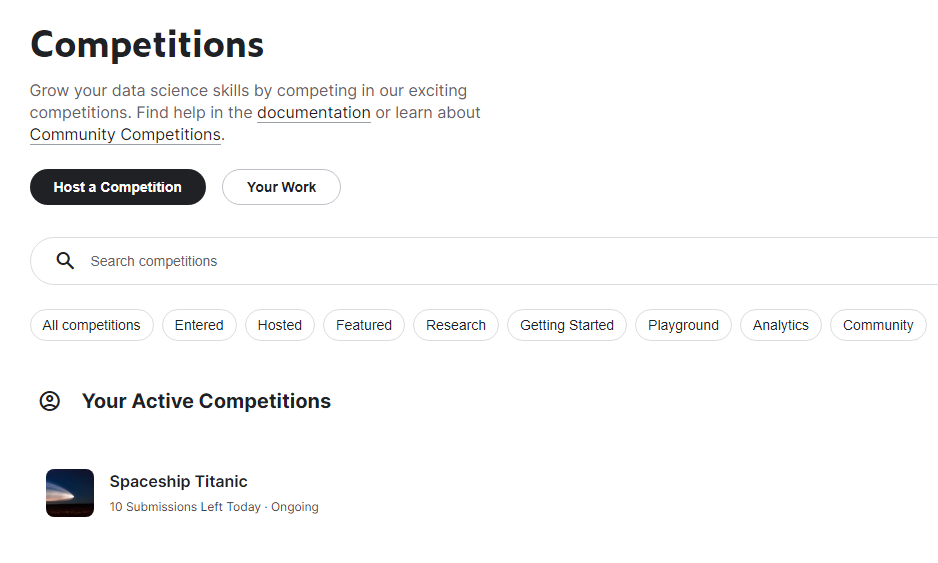

A acessar o conteúdo, na área de submit predictions, basta clicar na área aponta para cima como você vê na figura abaixo

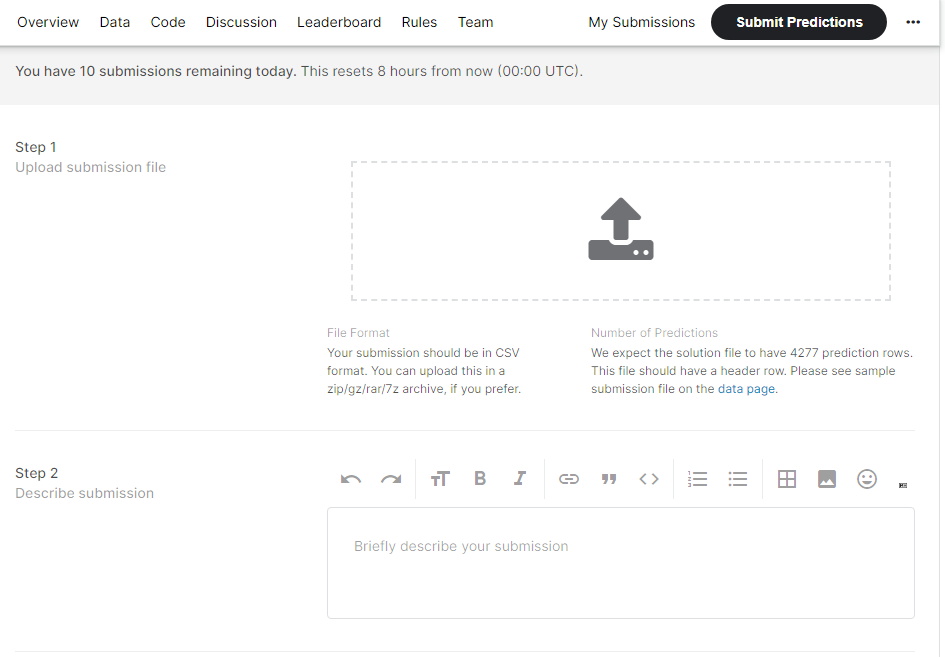

Pronto se tudo estiver certo, você irá ver na próxima tela sua pontuação e rank.

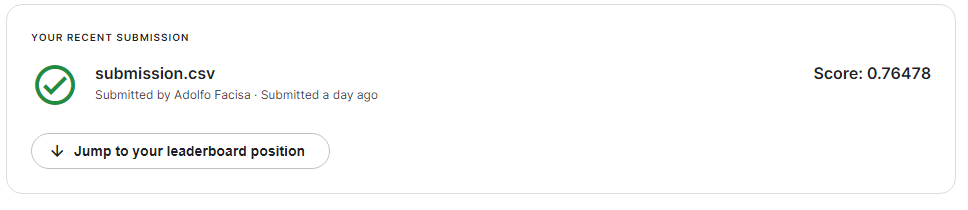

### REFERÊNCIAS

Conjunto de dados Kaggle: https://www.kaggle.com/c/spaceship-titanic/data

Como usar API do kaggle: https://www.flai.com.br/renanbispo/como-utilizar-o-api-kaggle-no-google-colab/

Conhecendo o Naive Bayes: https://www.digitalhouse.com/br/blog/naive-bayes/

Conhecendo o Kfold: https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90